## Imports

In [94]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets
from ipywidgets import interact, widgets

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.colors as mcolors
matplotlib.style.use('seaborn-whitegrid')

## General Info
Our **Projet** will focus on the restaurants of Geneva, Switzerland🇨🇭.

Our **Goal** is to be able to suggest an optimal location to open a new restaurant in Geneva 🎯 

## Our area of interest is represented on the following map 🗺

In [106]:
geneva=folium.Map(location=[46.2044, 6.1432], zoom_start=11)
geneva

## The data is a combination of info from trip advisor, google api and foresquare

In [96]:
# importing data to notebook
df=pd.read_csv("../raw_data/raw_data_combined_v1.02.csv")

In [97]:
numb_restaurant=df.shape[0]
numb_columns=df.shape[1]

## Results of Data Scraping and Cleaning

In [98]:
print(f'From the combination of the different sources we retrieved a total of {numb_restaurant} restaurants')


From the combination of the different sources we retrieved a total of 1726 restaurants


# Useful columns

- Name
- Cuisine Type
- Price Level
- Rating
- Latitude and Longitude
- Zip code


In [99]:
df.head()

,original_index,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,rating,...,zip_code,city,international_phone_number,website,combined_cuisine_type,ta_4sq_cuisine1,ta_4sq_cuisine2,ta_4sq_cuisine3,ta_4sq_cuisine4,ta_4sq_cuisine5
0,0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,4.2,...,1203,Genève,+41 22 344 28 29,NaN,"European, Swiss, International, 0, 0",European,Swiss,International,0,0
1,1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,3.7,...,1203,Genève,+41 22 345 84 48,NaN,"General / Restaurant, Café, 0, 0, 0, 0","General / Restaurant, Café",0,0,0,0
2,2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.9,...,1203,Genève,+41 22 344 49 41,https://yellow.local.ch/d/iWjaP0dHU9GYe4GDduNgnw,"Italian, French, International, European, Cent...",Italian,French,International,European,Central European
3,4,ChIJhb4e-Ep7jEcRY38kziIGZmE,NaN,NaN,Restaurant Divan,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",2.0,NaN,4.5,...,1213,Petit-Lancy,+41 22 792 96 80,NaN,NaN,0,0,0,0,0
4,5,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,...,1203,Genève,+41 22 561 38 04,NaN,NaN,0,0,0,0,0


In [7]:
df.columns

Index(['original_index', 'place_id', 'tripadvisor_id', 'fsq_id', 'name',
       'business_status', 'types', 'price_level', 'ta_price_level', 'rating',
       'user_ratings_total', 'ta_rating', 'ta_user_ratings_total',
       ' combined_rating ', 'geometry.location.lat', 'geometry.location.lng',
       'formatted_address', 'zip_code', 'city', 'international_phone_number',
       'website', 'combined_cuisine_type', 'ta_4sq_cuisine1',
       'ta_4sq_cuisine2', 'ta_4sq_cuisine3', 'ta_4sq_cuisine4',
       'ta_4sq_cuisine5'],
      dtype='object')

# Percentage of missing data

In [100]:
df[['name','price_level', 'rating', 'combined_cuisine_type']].isnull().sum()/len(df)

name                     0.000000
price_level              0.665122
rating                   0.180765
combined_cuisine_type    0.374855
dtype: float64

## Some Graphs

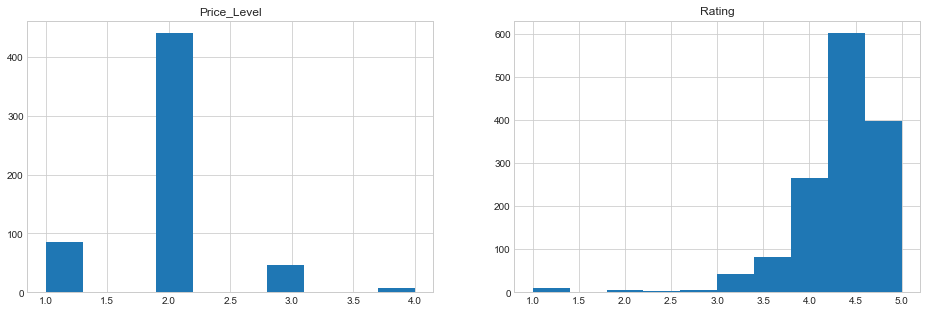

In [9]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.title("Price_Level")
plt.hist(df["price_level"])

plt.subplot(1, 2, 2)
plt.title("Rating")
plt.hist(df["rating"])
plt.show()

# Price level versus Ratings

<Figure size 1152x720 with 0 Axes>

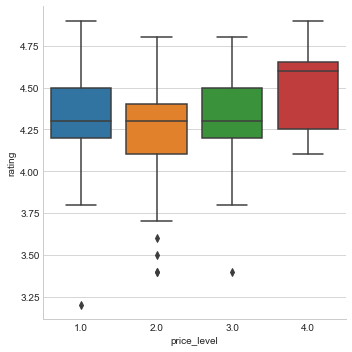

In [10]:
plt.figure(figsize=(16, 10))
sns.catplot(x='price_level', y='rating', data=df, kind="box");

## Considerations about the number of reviews and price level distribution

Text(0, 0.5, 'Reviews')

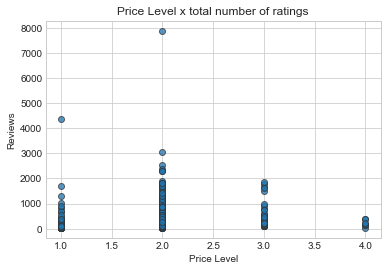

In [11]:
plt.scatter(df['price_level'], df['user_ratings_total'], edgecolor='#333333', alpha=0.75)

# plt.xscale('log')
# plt.yscale('log')

plt.title('Price Level x total number of ratings')
plt.xlabel('Price Level')
plt.ylabel('Reviews')

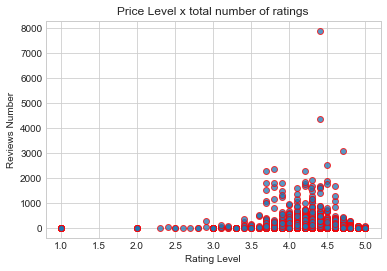

In [12]:
plt.scatter(df['rating'], df['user_ratings_total'], edgecolor='red', alpha=0.75)

plt.title('Price Level x total number of ratings')
plt.xlabel('Rating Level')
plt.ylabel('Reviews Number')
plt.show()

# Some visualizations on a Heatmap

In [13]:
def search_venue(df, category):
  search = lambda x:True if category.lower() in x.lower() else False
  venues = df[df['name'].apply(search)].reset_index(drop='index')
  venues_lat_long = list(zip(venues['geometry.location.lat'], venues['geometry.location.lng']))
  return venues_lat_long


def heatmap_venues(data):
    map=folium.Map(location=[46.204391, 6.143158], tiles="openstreetmap",zoom_start=14, min_zoom=13,max_zoom=15)
    HeatMap(data).add_to(map)
    return map

In [107]:
@interact
def show_maps(name=['pizza','grill', 'italian', 'sushi', 'cafe']):
    cuisine = search_venue(df, name)
    return heatmap_venues(cuisine)

interactive(children=(Dropdown(description='name', options=('pizza', 'grill', 'italian', 'sushi', 'cafe'), val…

In [104]:
def search_category(df, category):
  search = lambda x:True if category.lower() in x.lower() else False
  venues = df[df['combined_cuisine_type'].apply(search)].reset_index(drop='index')
  venues_lat_long = list(zip(venues['geometry.location.lat'], venues['geometry.location.lng']))
  return venues_lat_long


def heatmap_category(data):
    map=folium.Map(location=[46.204391, 6.143158], tiles="openstreetmap",zoom_start=14, min_zoom=13,max_zoom=15)
    HeatMap(data).add_to(map)
    return map

In [105]:
@interact
def show_maps_category(name=['italian','Cafes','Seafood', 'Burger', 'sushi', 'Asian']):
    cuisine = search_venue(df, name)
    return heatmap_venues(cuisine)

interactive(children=(Dropdown(description='name', options=('european', 'italian', 'Cafes', 'Seafood', 'Burger…

In [19]:
for i in range(df.shape[0]):
    folium.Marker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]], popup=df['name'][i], icon=folium.Icon(color='red')).add_to(geneva)

In [74]:
geneva_rating=folium.Map(location=[46.2044, 6.1432], tiles='cartodbpositron', zoom_start=11)
geneva_price =folium.Map(location=[46.2044, 6.1432],tiles='cartodbpositron', zoom_start=11)
geneva_rating_num =folium.Map(location=[46.2044, 6.1432],tiles='cartodbpositron', zoom_start=11)

## Ratings

In [75]:
for i in range(df.shape[0]):
    if df['rating'][i]<=2.5:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='red',fillColor='red', fill=True, popup=[df['name'][i], df['rating'][i]]).add_to(geneva_rating)
    elif df['rating'][i]>2.5 and df['rating'][i]<=3.5:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='orange',fillColor='orange', fill=True, popup=[df['name'][i], df['rating'][i]]).add_to(geneva_rating)
    elif df['rating'][i]>3.5 and df['rating'][i]<=4:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='yellow',fillColor='yellow', fill=True, popup=[df['name'][i], df['rating'][i]]).add_to(geneva_rating)
    elif df['rating'][i]>4 and df['rating'][i]<=4.5:   
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]], radius=5, color='lightgreen',fillColor='lightgreen', fill=True,  popup=[df['name'][i], df['rating'][i]]).add_to(geneva_rating)
    elif df['rating'][i]>4.5:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]], radius=5, color='green',fillColor='green', fill=True, popup=[df['name'][i], df['rating'][i]] ).add_to(geneva_rating)
    else:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='white',fillColor='white', fill=True, popup=[df['name'][i], df['rating'][i]]).add_to(geneva_rating)
        

## Prices

In [76]:
for i in range(df.shape[0]):
    if df['price_level'][i]<=2:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='green',fillColor='green',fillOpacity=1, fill=True, popup=[df['name'][i],df['price_level'][i]]).add_to(geneva_price)
    elif df['price_level'][i]>2 and df['rating'][i]<=3.5:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='lightgreen',fillColor='lightgreen',fillOpacity=1,fill=True, popup=[df['name'][i],df['price_level'][i]]).add_to(geneva_price)
    elif df['price_level'][i]>3.5 and df['rating'][i]<=4:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='yellow',fillColor='yellow',fillOpacity=1,fill=True, popup=[df['name'][i],df['price_level'][i]]).add_to(geneva_price)
    elif df['price_level'][i]>4 and df['rating'][i]<=4.5:   
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='orange',fillColor='orange',fillOpacity=1,fill=True, popup=[df['name'][i],df['price_level'][i]]).add_to(geneva_price)
    elif df['price_level'][i]>4.5:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5,color='red',fillColor='red',fillOpacity=1,fill=True, popup=[df['name'][i],df['price_level'][i]]).add_to(geneva_price)
    else:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5,color='white',fillColor='white',fillOpacity=1,fill=True, popup=[df['name'][i],df['price_level'][i]]).add_to(geneva_price)
     

# Number of reviews

In [77]:
for i in range(df.shape[0]):
    if df['user_ratings_total'][i]<=10:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='red',fillColor='red',fillOpacity=1, fill=True, popup=[df['name'][i],df['user_ratings_total'][i]]).add_to(geneva_rating_num)
    elif df['user_ratings_total'][i]>10 and df['user_ratings_total'][i]<=20:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='orange',fillColor='orange',fillOpacity=1,fill=True, popup=[df['name'][i],df['user_ratings_total'][i]]).add_to(geneva_rating_num)
    elif df['user_ratings_total'][i]>20 and df['user_ratings_total'][i]<=60:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='yellow',fillColor='yellow',fillOpacity=1,fill=True, popup=[df['name'][i],df['user_ratings_total'][i]]).add_to(geneva_rating_num)
    elif df['user_ratings_total'][i]>600 and df['user_ratings_total'][i]<=100:   
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5, color='lightgreen',fillColor='lightgreen',fillOpacity=1,fill=True, popup=[df['name'][i],df['user_ratings_total'][i]]).add_to(geneva_rating_num)
    elif df['user_ratings_total'][i]>100:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5,color='green',fillColor='green',fillOpacity=1,fill=True, popup=[df['name'][i],df['user_ratings_total'][i]]).add_to(geneva_rating_num)
    else:
        folium.CircleMarker(location=[df['geometry.location.lat'][i], df['geometry.location.lng'][i]],radius=5,color='white',fillColor='white',fillOpacity=1,fill=True, popup=[df['name'][i],df['user_ratings_total'][i]]).add_to(geneva_rating_num)

In [78]:
geneva.save('index.html')
geneva_rating.save('ratings.html')
geneva_price.save('prices.html')
geneva_rating_num.save('rating_number.html')

In [92]:
df.head()


In [93]:
df[['price_level','ta_price_level','price']]

,price_level,ta_price_level,price
0,2.0,2.0,
1,NaN,NaN,
2,NaN,2.0,
3,2.0,NaN,
4,NaN,NaN,
...,...,...,...
1721,2.0,2.0,
1722,2.0,2.0,
1723,2.0,NaN,
1724,NaN,2.0,


Index(['original_index', 'place_id', 'tripadvisor_id', 'fsq_id', 'name',
       'business_status', 'types', 'price_level', 'ta_price_level', 'rating',
       'user_ratings_total', 'ta_rating', 'ta_user_ratings_total',
       ' combined_rating ', 'geometry.location.lat', 'geometry.location.lng',
       'formatted_address', 'zip_code', 'city', 'international_phone_number',
       'website', 'combined_cuisine_type', 'ta_4sq_cuisine1',
       'ta_4sq_cuisine2', 'ta_4sq_cuisine3', 'ta_4sq_cuisine4',
       'ta_4sq_cuisine5', 'price'],
      dtype='object')